# Smart Lead Scoring Engine


* Can you identify the potential leads for a D2C startup?




### Problem Statement


* A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


* Leads are captured in 2 ways - Directly and Indirectly. 


* Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


* Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


* Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.



### About Dataset


* You are provided with the leads data of last year containing both direct and indirect leads. Each lead provides information about their activity on the platform, signup information and campaign information. Based on his past activity on the platform, you need to build the predictive model to classify if the user would buy the product in the next 3 months or not.



### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
train_df= pd.read_csv("train_wn75k28.csv")
test_df = pd.read_csv("test_Wf7sxXF.csv")

### Data Exploration

In [3]:
train_df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [4]:
# check shape of dataset
train_df.shape

(39161, 19)

In [5]:
# check column names
train_df.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

In [6]:
print(test_df.shape)
print(test_df.columns)

(13184, 18)
Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12'],
      dtype='object')


In [7]:
# check basic info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [8]:
# check statistical summary of train data
train_df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [9]:
# check unique values
train_df.nunique()

id                      39161
created_at                365
campaign_var_1             16
campaign_var_2             15
products_purchased          4
signup_date              1800
user_activity_var_1         4
user_activity_var_2         2
user_activity_var_3         2
user_activity_var_4         2
user_activity_var_5         3
user_activity_var_6         4
user_activity_var_7         3
user_activity_var_8         3
user_activity_var_9         2
user_activity_var_10        2
user_activity_var_11        5
user_activity_var_12        2
buy                         2
dtype: int64

In [10]:
# check is there any missing value present in dataset or not
train_df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [11]:
round(100*(train_df.isnull().sum()/len(train_df.index)), 2)

id                       0.00
created_at               0.00
campaign_var_1           0.00
campaign_var_2           0.00
products_purchased      53.40
signup_date             38.59
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_3      0.00
user_activity_var_4      0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
user_activity_var_11     0.00
user_activity_var_12     0.00
buy                      0.00
dtype: float64

Here we can see there is a missing values present in `products_purchased` and `signup_date`.

* **Convert `created_at` into datetime format**

In [12]:
# train data
train_df['created_at'] = pd.to_datetime(train_df['created_at'])

#test data
test_df['created_at'] = pd.to_datetime(test_df['created_at'])

In [13]:
train_df['created_at_year'] = train_df['created_at'].dt.year
train_df['created_at_month'] = train_df['created_at'].dt.month
train_df['created_at_day'] = train_df['created_at'].dt.day
train_df.drop("created_at", axis=1, inplace=True)
train_df.head()

,id,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,...,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at_year,created_at_month,created_at_day
0,1,1,2,2.0,2020-09-24,0,0,0,0,0,...,1,1,0,0,0,0,0,2021,1,1
1,2,2,1,2.0,2020-09-19,1,0,1,0,0,...,1,0,0,0,0,0,0,2021,1,1
2,3,9,3,3.0,2021-08-11,1,0,0,0,0,...,0,0,0,0,0,0,0,2021,1,1
3,4,6,7,2.0,2017-10-04,0,0,0,0,0,...,0,0,0,0,0,0,0,2021,1,1
4,5,4,6,NaN,2020-06-08,0,0,0,0,0,...,1,0,0,0,1,0,0,2021,1,1


* **Convert `signup_date` into datetime format**

In [14]:
# train data
train_df['signup_date'] = pd.to_datetime(train_df['signup_date'])

#test data
test_df['signup_date'] = pd.to_datetime(test_df['signup_date'])

In [15]:
train_df['signup_date_year'] = train_df['signup_date'].dt.year
train_df['signup_date_month'] = train_df['signup_date'].dt.month
train_df['signup_date_day'] = train_df['signup_date'].dt.day
train_df.drop("signup_date", axis=1, inplace=True)
train_df.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at_year,created_at_month,created_at_day,signup_date_year,signup_date_month,signup_date_day
0,1,1,2,2.0,0,0,0,0,0,0,...,0,0,0,0,2021,1,1,2020.0,9.0,24.0
1,2,2,1,2.0,1,0,1,0,0,0,...,0,0,0,0,2021,1,1,2020.0,9.0,19.0
2,3,9,3,3.0,1,0,0,0,0,0,...,0,0,0,0,2021,1,1,2021.0,8.0,11.0
3,4,6,7,2.0,0,0,0,0,0,0,...,0,0,0,0,2021,1,1,2017.0,10.0,4.0
4,5,4,6,NaN,0,0,0,0,0,0,...,0,1,0,0,2021,1,1,2020.0,6.0,8.0


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   campaign_var_1        39161 non-null  int64  
 2   campaign_var_2        39161 non-null  int64  
 3   products_purchased    18250 non-null  float64
 4   user_activity_var_1   39161 non-null  int64  
 5   user_activity_var_2   39161 non-null  int64  
 6   user_activity_var_3   39161 non-null  int64  
 7   user_activity_var_4   39161 non-null  int64  
 8   user_activity_var_5   39161 non-null  int64  
 9   user_activity_var_6   39161 non-null  int64  
 10  user_activity_var_7   39161 non-null  int64  
 11  user_activity_var_8   39161 non-null  int64  
 12  user_activity_var_9   39161 non-null  int64  
 13  user_activity_var_10  39161 non-null  int64  
 14  user_activity_var_11  39161 non-null  int64  
 15  user_activity_var_1

### Exploratory Data Analysis
* **Data Visualization**

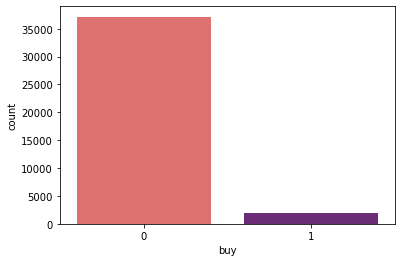

0    37163
1     1998
Name: buy, dtype: int64

In [17]:
sns.countplot(train_df["buy"], palette = 'magma_r')
plt.show()
train_df.buy.value_counts()


Here we can see data is imbalance. So we have to balance this data.

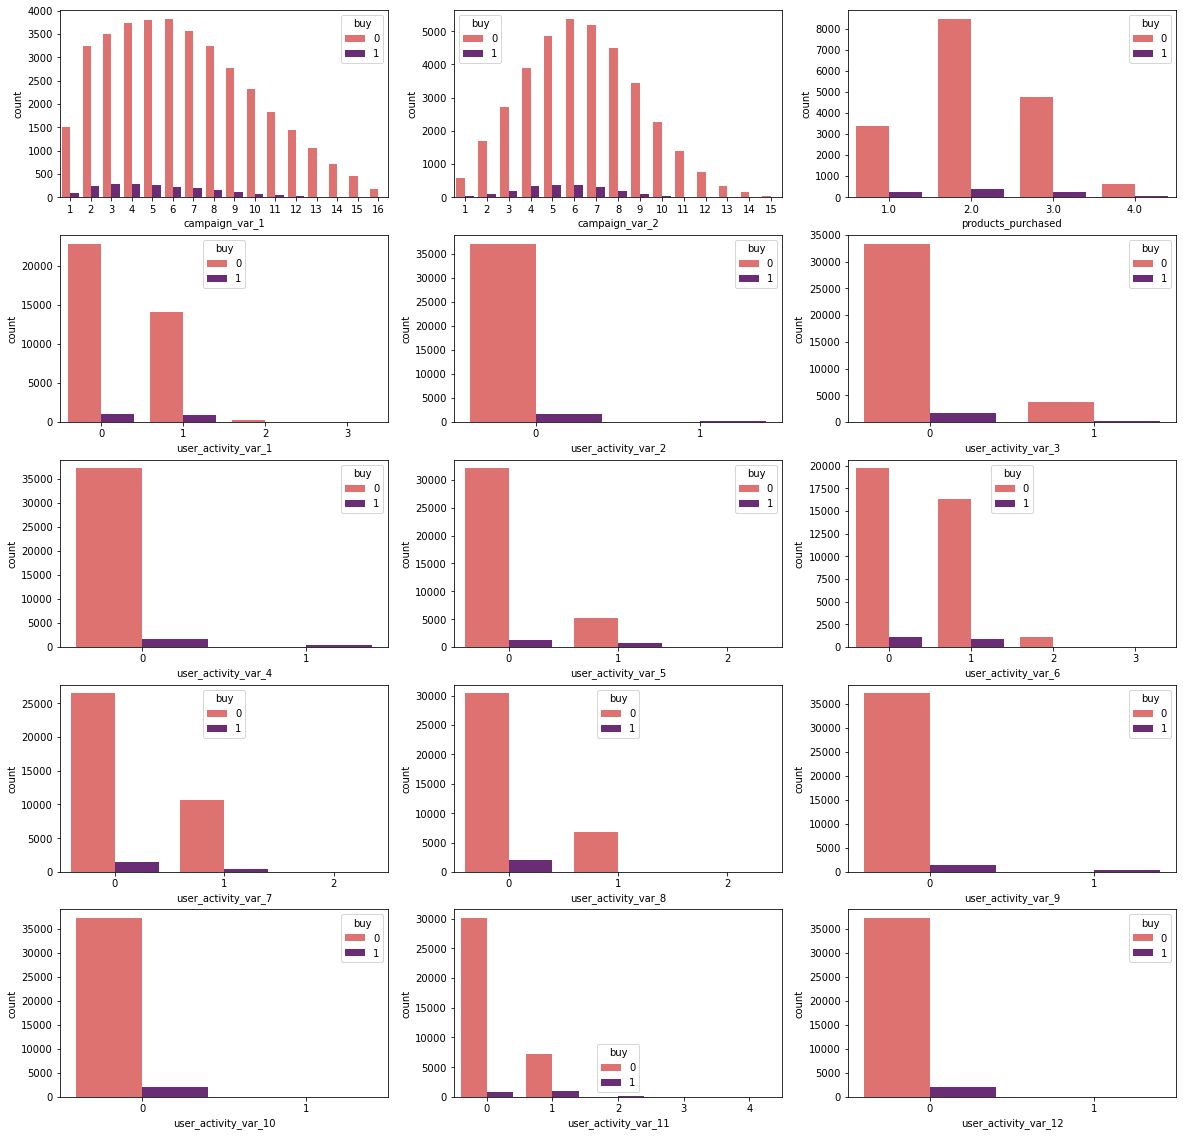

In [18]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(5,3,figsize = (20,20))
sns.countplot(x = "campaign_var_1", hue = "buy", data = train_df, ax = axs[0,0],palette = 'magma_r')
sns.countplot(x = "campaign_var_2", hue = "buy", data = train_df, ax = axs[0,1],palette = 'magma_r')
sns.countplot(x = "products_purchased", hue = "buy", data = train_df, ax = axs[0,2],palette = 'magma_r')
sns.countplot(x = "user_activity_var_1", hue = "buy", data = train_df, ax = axs[1,0],palette = 'magma_r')
sns.countplot(x = "user_activity_var_2", hue = "buy", data = train_df, ax = axs[1,1],palette = 'magma_r')
sns.countplot(x = "user_activity_var_3", hue = "buy", data = train_df, ax = axs[1,2],palette = 'magma_r')
sns.countplot(x = "user_activity_var_4", hue = "buy", data = train_df, ax = axs[2,0],palette = 'magma_r')
sns.countplot(x = "user_activity_var_5", hue = "buy", data = train_df, ax = axs[2,1],palette = 'magma_r')
sns.countplot(x = "user_activity_var_6", hue = "buy", data = train_df, ax = axs[2,2],palette = 'magma_r')
sns.countplot(x = "user_activity_var_7", hue = "buy", data = train_df, ax = axs[3,0],palette = 'magma_r')
sns.countplot(x = "user_activity_var_8", hue = "buy", data = train_df, ax = axs[3,1],palette = 'magma_r')
sns.countplot(x = "user_activity_var_9", hue = "buy", data = train_df, ax = axs[3,2],palette = 'magma_r')
sns.countplot(x = "user_activity_var_10", hue = "buy", data = train_df, ax = axs[4,0],palette = 'magma_r')
sns.countplot(x = "user_activity_var_11", hue = "buy", data = train_df, ax = axs[4,1],palette = 'magma_r')
sns.countplot(x = "user_activity_var_12", hue = "buy", data = train_df, ax = axs[4,2],palette = 'magma_r')

plt.show()

from above plots we can see data is very imbalance.

* **Check Signup Date**

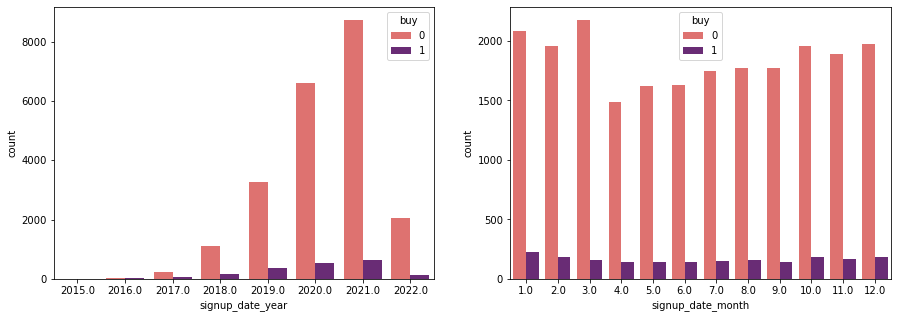

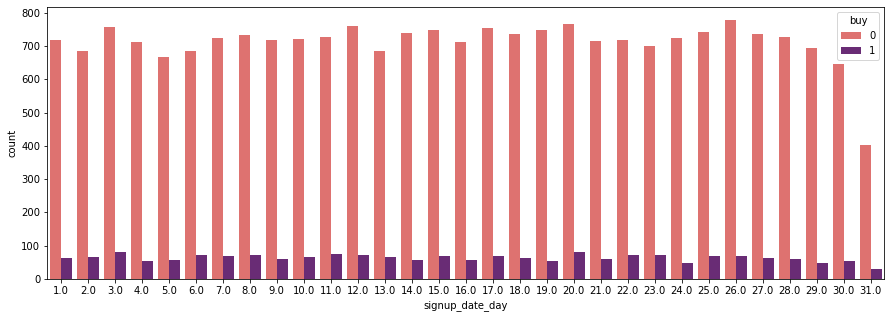

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x= train_df['signup_date_year'],hue = train_df["buy"] , palette="magma_r")
plt.subplot(1,2,2)
sns.countplot(x= train_df['signup_date_month'],hue = train_df["buy"] , palette="magma_r")
plt.show()


plt.figure(figsize=(15,5))
sns.countplot(x= train_df['signup_date_day'],hue = train_df["buy"] , palette="magma_r")

plt.show()

* from above plot we can see that most of the persons is sign up in the year **2020-2021**. In that year buy is also high than other years. 
* In the month of January, February & March sign up is mostly done by peoples and buying also high than other months of the year.


* **Check Date of lead dropped**

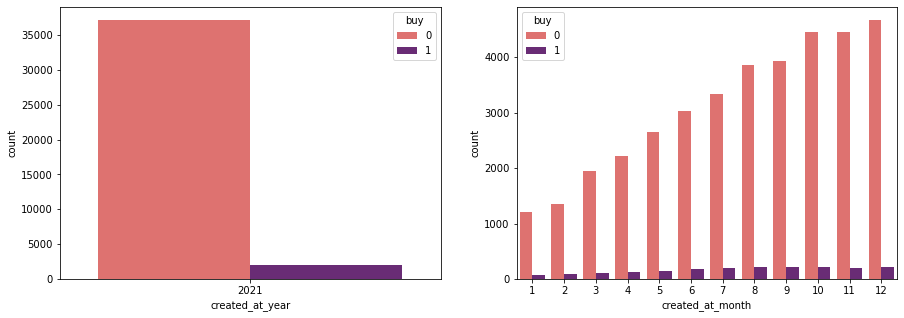

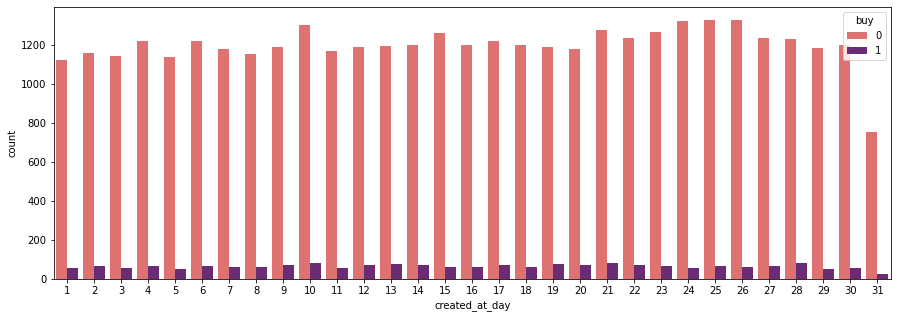

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x= train_df['created_at_year'],hue = train_df["buy"] , palette="magma_r")
plt.subplot(1,2,2)
sns.countplot(x= train_df['created_at_month'],hue = train_df["buy"] , palette="magma_r")
plt.show()


plt.figure(figsize=(15,5))
sns.countplot(x= train_df['created_at_day'],hue = train_df["buy"] , palette="magma_r")

plt.show()

* Here we can see we have the data where lead dropped in the year **2021**. 
* When lead dropped how many persons buy product is shown above plots.
* Most of the lead drop is occure in the month of Oct, Nov, Dec month.

* **Product Purchased Past**

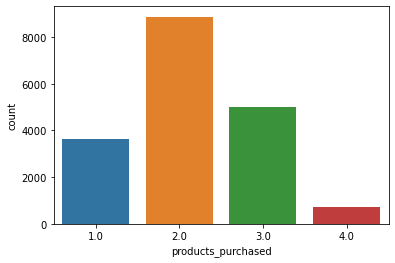

In [21]:
sns.countplot(train_df["products_purchased"])
plt.show()

   * There are 4 uniqe values present in the `products_purchased` & **2** products is mostly purchased by leads.

* **Past Product Purchase vs Sign up date.**

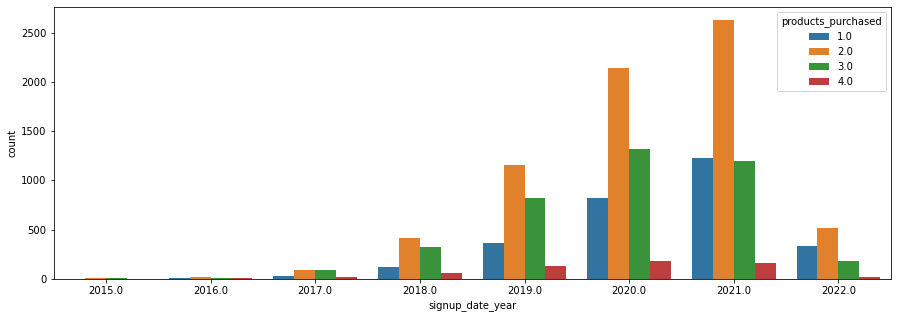

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(train_df["signup_date_year"],hue= train_df["products_purchased"])
plt.show()

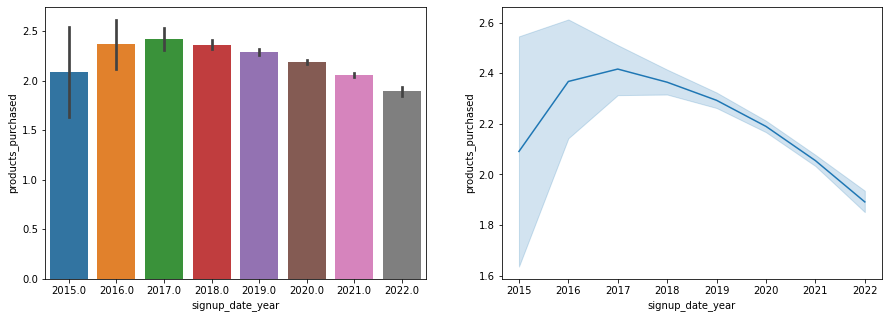

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(y= train_df["products_purchased"], x= train_df["signup_date_year"])
plt.subplot(1,2,2)
sns.lineplot(y= train_df["products_purchased"], x= train_df["signup_date_year"])
plt.show()

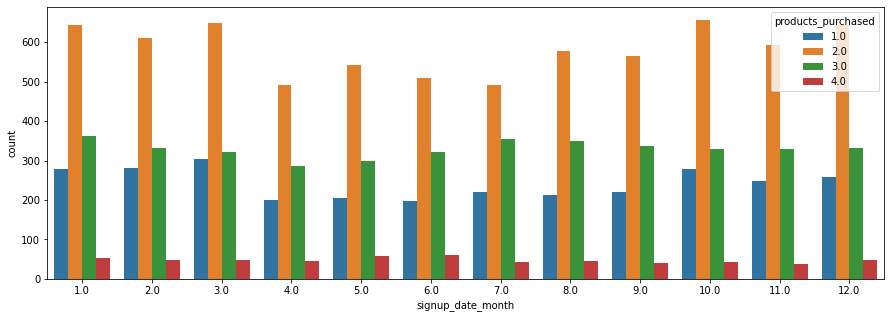

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(train_df["signup_date_month"],hue= train_df["products_purchased"])
plt.show()

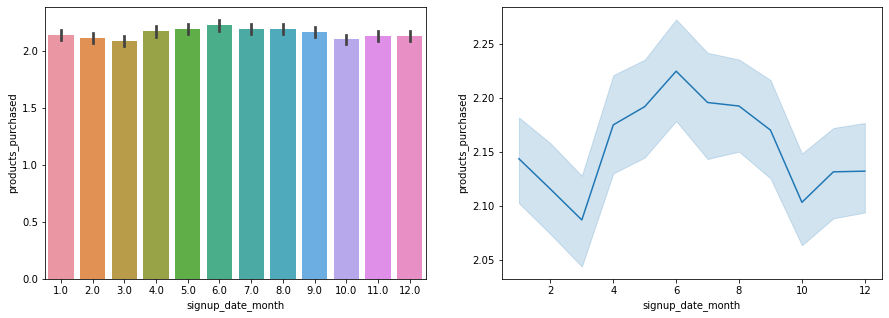

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(y= train_df["products_purchased"], x= train_df["signup_date_month"])
plt.subplot(1,2,2)
sns.lineplot(y= train_df["products_purchased"], x= train_df["signup_date_month"])
plt.show()

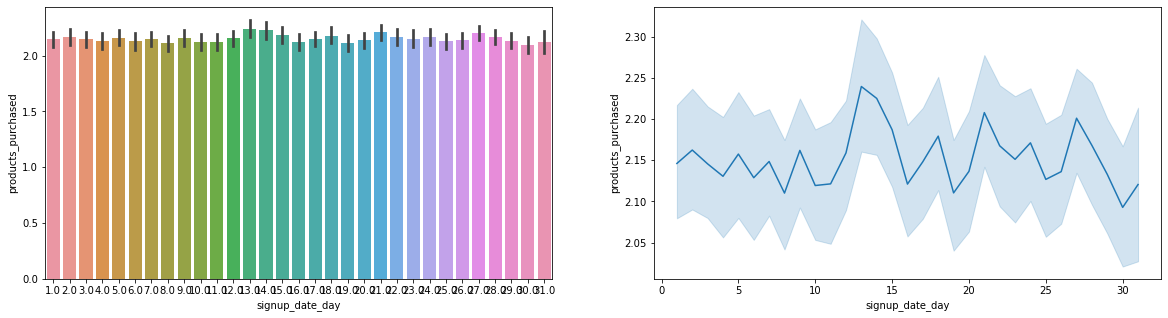

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(y= train_df["products_purchased"], x= train_df["signup_date_day"])
plt.subplot(1,2,2)
sns.lineplot(y= train_df["products_purchased"], x= train_df["signup_date_day"])
plt.show()

* From above plot we can see that `products_purchased` is less every year. 
* Purchase of product is high in the year **2016-17**& In month of **May, June, July & August**.

* **Product purchased vs created date**

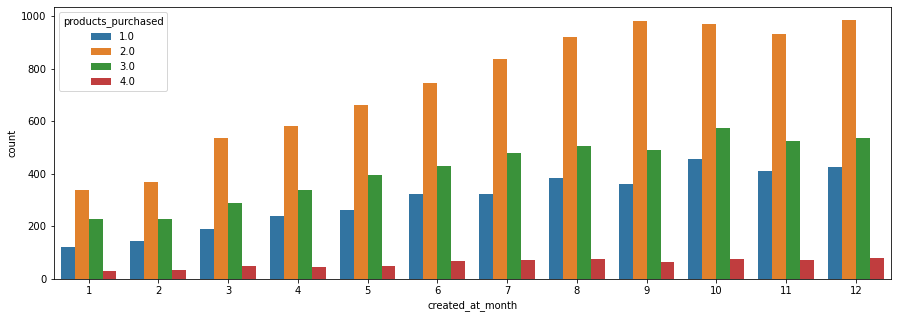

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(train_df["created_at_month"],hue= train_df["products_purchased"])
plt.show()

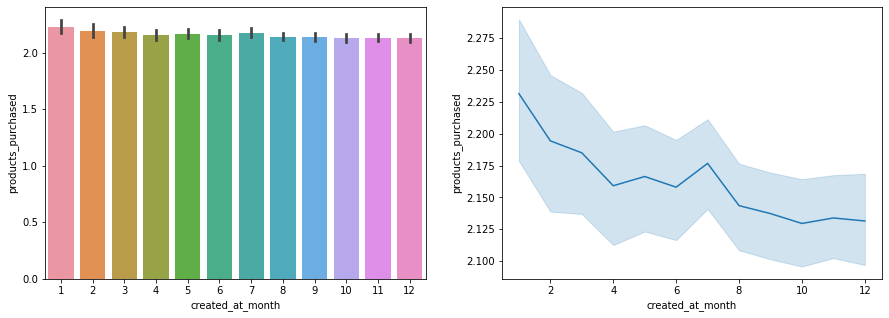

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(y= train_df["products_purchased"], x= train_df["created_at_month"])
plt.subplot(1,2,2)
sns.lineplot(y= train_df["products_purchased"], x= train_df["created_at_month"])
plt.show()

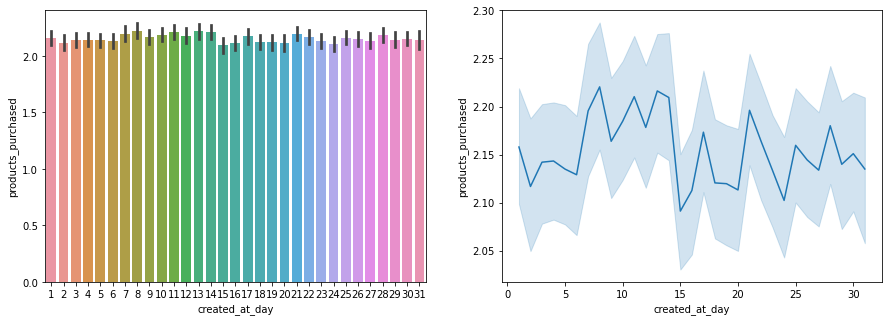

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(y= train_df["products_purchased"], x= train_df["created_at_day"])
plt.subplot(1,2,2)
sns.lineplot(y= train_df["products_purchased"], x= train_df["created_at_day"])
plt.show()

* Above plots shows the past products purchased is getting less every month.

### Correlation

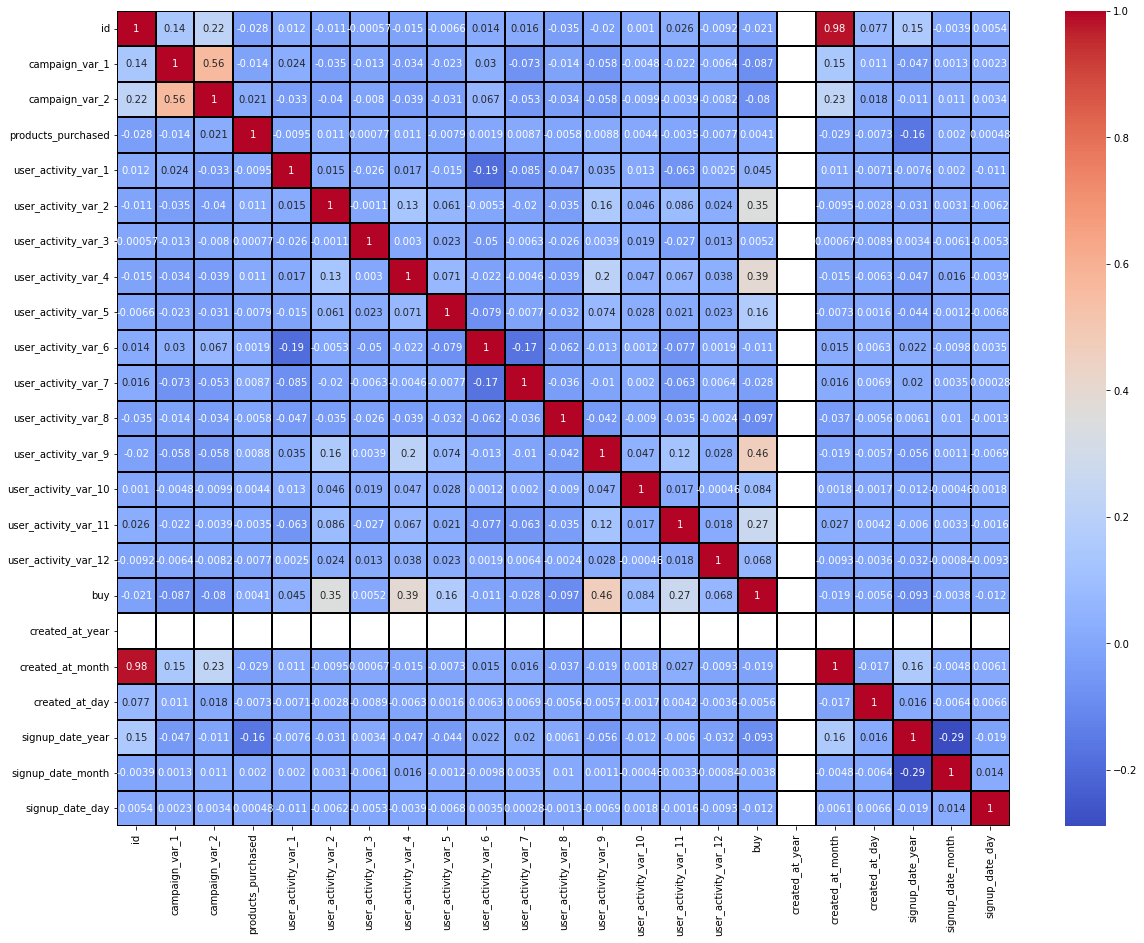

In [30]:
plt.figure(figsize=(20,15))

sns.heatmap(train_df.corr(),annot= True, linewidths= 0.2,linecolor= "Black", cmap= "coolwarm")
plt.show()

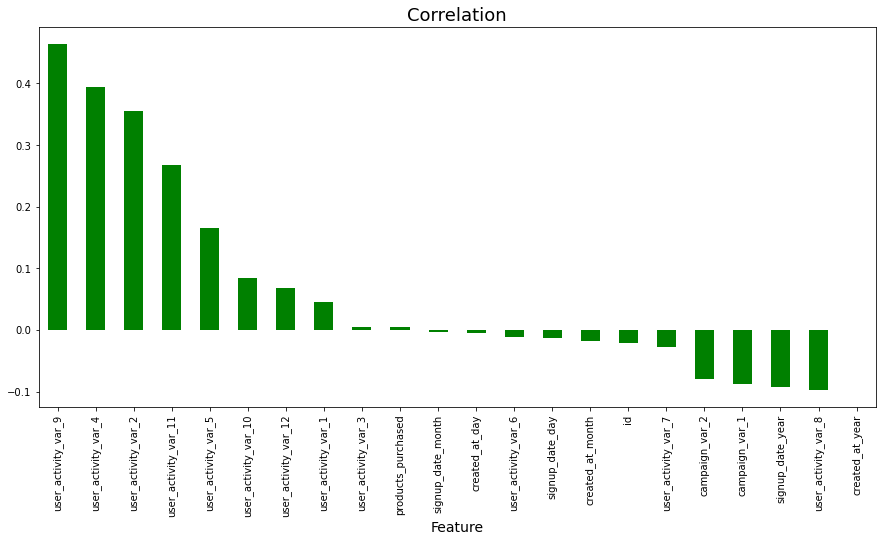

In [31]:
plt.figure(figsize=(15,7))
train_df.corr()['buy'].sort_values(ascending=False).drop(['buy']).plot(kind='bar', color='g')
plt.xlabel("Feature",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

### Feature Engineering 
* **Handling Missing Values**

In [32]:
train_df.isnull().sum()

id                          0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
created_at_year             0
created_at_month            0
created_at_day              0
signup_date_year        15113
signup_date_month       15113
signup_date_day         15113
dtype: int64

* `product_purchased` & `signup date`are a discrete features so we have to use **mode** to fill null values.


* **products_purchased**

In [33]:
train_df["products_purchased"]= train_df["products_purchased"].fillna(train_df["products_purchased"].mode()[0])
train_df["products_purchased"].value_counts()

2.0    29778
3.0     5024
1.0     3643
4.0      716
Name: products_purchased, dtype: int64

* **signup_date**

In [34]:
train_df["signup_date_year"].value_counts()

2021.0    9383
2020.0    7134
2019.0    3649
2022.0    2207
2018.0    1282
2017.0     318
2016.0      62
2015.0      13
Name: signup_date_year, dtype: int64

In [35]:
train_df["signup_date_year"]= train_df["signup_date_year"].fillna(train_df["signup_date_year"].mode()[0])

In [36]:
train_df["signup_date_day"].value_counts()

20.0    848
26.0    848
3.0     838
12.0    833
17.0    823
15.0    818
25.0    810
8.0     804
19.0    803
11.0    803
18.0    799
27.0    797
14.0    796
7.0     791
22.0    789
10.0    788
28.0    787
1.0     781
9.0     780
21.0    776
24.0    772
16.0    771
23.0    770
4.0     766
6.0     758
13.0    751
2.0     749
29.0    743
5.0     726
30.0    699
31.0    431
Name: signup_date_day, dtype: int64

In [37]:
train_df["signup_date_day"]= train_df["signup_date_day"].fillna(train_df["signup_date_day"].median())

In [38]:
train_df["signup_date_month"].value_counts()

3.0     2334
1.0     2307
12.0    2157
2.0     2139
10.0    2138
11.0    2061
8.0     1928
9.0     1922
7.0     1897
6.0     1772
5.0     1769
4.0     1624
Name: signup_date_month, dtype: int64

In [39]:
train_df["signup_date_month"]= train_df["signup_date_month"].fillna(train_df["signup_date_month"].mode()[0])

In [40]:
train_df.isnull().sum()

id                      0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
created_at_year         0
created_at_month        0
created_at_day          0
signup_date_year        0
signup_date_month       0
signup_date_day         0
dtype: int64

Successfully Handling Missing values. No more missing values present in dataset.

* No use of id column for building a model so we have to drop it**

In [41]:
train_df= train_df.drop("id", axis=1)

* **Divide Independent and Dependent features**

In [42]:
x= train_df.drop('buy', axis = 1)
y= train_df["buy"]

In [43]:
x.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at_year,created_at_month,created_at_day,signup_date_year,signup_date_month,signup_date_day
0,1,2,2.0,0,0,0,0,0,0,1,...,0,0,0,0,2021,1,1,2020.0,9.0,24.0
1,2,1,2.0,1,0,1,0,0,0,1,...,0,0,0,0,2021,1,1,2020.0,9.0,19.0
2,9,3,3.0,1,0,0,0,0,0,0,...,0,0,0,0,2021,1,1,2021.0,8.0,11.0
3,6,7,2.0,0,0,0,0,0,0,0,...,0,0,0,0,2021,1,1,2017.0,10.0,4.0
4,4,6,2.0,0,0,0,0,0,0,1,...,0,0,1,0,2021,1,1,2020.0,6.0,8.0


In [44]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: buy, dtype: int64

### Handling Imbalanced Data 

In [48]:
# use over sampling method for balance data.
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', y.shape)
print('Resample dataset shape', y_ros.shape)

Original dataset shape (39161,)
Resample dataset shape (74326,)


### Feature Selection

Feature selection is used for removing irrelevant features. We can use only important features for model prediction.

[0.05454093 0.0491353  0.02516584 0.02422104 0.05499278 0.01066474
 0.0830076  0.05295644 0.02793365 0.01864031 0.040476   0.10067908
 0.00181295 0.1305774  0.00118825 0.         0.04977345 0.04944084
 0.06594553 0.08049156 0.0783563 ]


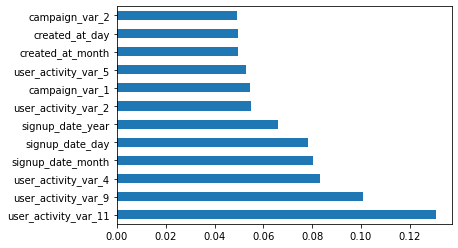

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_ros,y_ros)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x_ros.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [50]:
# In terms of percentage
feat_importances*100

campaign_var_1           5.454093
campaign_var_2           4.913530
products_purchased       2.516584
user_activity_var_1      2.422104
user_activity_var_2      5.499278
user_activity_var_3      1.066474
user_activity_var_4      8.300760
user_activity_var_5      5.295644
user_activity_var_6      2.793365
user_activity_var_7      1.864031
user_activity_var_8      4.047600
user_activity_var_9     10.067908
user_activity_var_10     0.181295
user_activity_var_11    13.057740
user_activity_var_12     0.118825
created_at_year          0.000000
created_at_month         4.977345
created_at_day           4.944084
signup_date_year         6.594553
signup_date_month        8.049156
signup_date_day          7.835630
dtype: float64

In [51]:
feat_importances.nlargest(8)

user_activity_var_11    0.130577
user_activity_var_9     0.100679
user_activity_var_4     0.083008
signup_date_month       0.080492
signup_date_day         0.078356
signup_date_year        0.065946
user_activity_var_2     0.054993
campaign_var_1          0.054541
dtype: float64

In [52]:
sum(feat_importances.nlargest(8))

0.6485911920630776

In [53]:
x_ros.columns

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'created_at_year', 'created_at_month', 'created_at_day',
       'signup_date_year', 'signup_date_month', 'signup_date_day'],
      dtype='object')

In [54]:
col1=['user_activity_var_2','user_activity_var_4' ,'user_activity_var_5','user_activity_var_9', 'user_activity_var_11','signup_date_year','signup_date_month', 'signup_date_day' ]
X = x_ros[col1]
X.head()

,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_9,user_activity_var_11,signup_date_year,signup_date_month,signup_date_day
0,0,0,0,0,0,2020.0,9.0,24.0
1,0,0,0,0,0,2020.0,9.0,19.0
2,0,0,0,0,0,2021.0,8.0,11.0
3,0,0,0,0,0,2017.0,10.0,4.0
4,0,0,0,0,1,2020.0,6.0,8.0


### Feature Scaling

In [55]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler
col= ['signup_date_year', 'signup_date_month', 'signup_date_day' ]
sc=StandardScaler()
X[col] = sc.fit_transform(X[col])
X.head()

,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_9,user_activity_var_11,signup_date_year,signup_date_month,signup_date_day
0,0,0,0,0,0,-0.217631,0.939298,1.076789
1,0,0,0,0,0,-0.217631,0.939298,0.431356
2,0,0,0,0,0,0.622401,0.653067,-0.601336
3,0,0,0,0,0,-2.737727,1.225529,-1.504942
4,0,0,0,0,1,-0.217631,0.080606,-0.988596


### Train-Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_ros, train_size=0.7, test_size=0.3, random_state=19)

### Model Building 

#### Import Models from Sklearn

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

### Logistic Regression

Accuracy Score:  83.3124046999731
f1 Score:  82.15090900369358


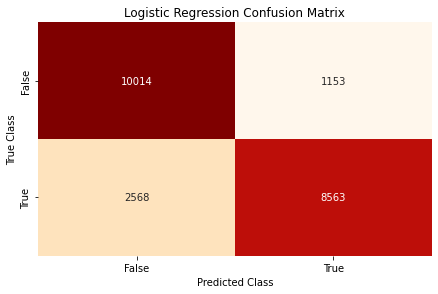

Classification Report:-
              precision    recall  f1-score   support

           0       0.80      0.90      0.84     11167
           1       0.88      0.77      0.82     11131

    accuracy                           0.83     22298
   macro avg       0.84      0.83      0.83     22298
weighted avg       0.84      0.83      0.83     22298



In [59]:
#Logistic Regression Model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)


#Accuracy Score
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print('Accuracy Score: ', lr_accuracy*100)

#f1_score
lr_f1_score = f1_score(y_test, lr_y_pred)
print('f1 Score: ', lr_f1_score*100)

#Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)
classes_names = ['False', 'True']
lr_ConfusionMatrix = pd.DataFrame(lr_cm, index=classes_names, columns=classes_names )

sns.heatmap(lr_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Logistic Regression Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, lr_y_pred))

### Decision Tree

Accuracy Score:  81.361557090322
f1 Score:  79.55730447614361


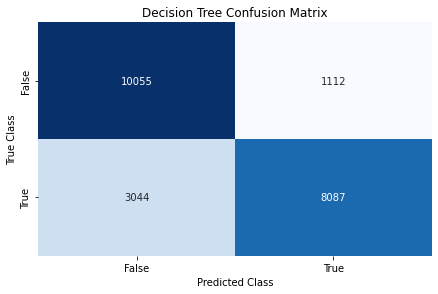

Classification Report:-
              precision    recall  f1-score   support

           0       0.77      0.90      0.83     11167
           1       0.88      0.73      0.80     11131

    accuracy                           0.81     22298
   macro avg       0.82      0.81      0.81     22298
weighted avg       0.82      0.81      0.81     22298



In [60]:
#Decision Tree Model
dtree = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=33) #criterion can be entropy
dtree.fit(X_train, y_train)
dtree_y_pred = dtree.predict(X_test)


#Score
dtree_accuracy = accuracy_score(y_test, dtree_y_pred)
print('Accuracy Score: ', dtree_accuracy*100)

#f1_score
dtree_f1_score = f1_score(y_test, dtree_y_pred)
print('f1 Score: ', dtree_f1_score*100)

#Confusion Matrix
dtree_cm = confusion_matrix(y_test, dtree_y_pred)
dtree_ConfusionMatrix = pd.DataFrame(dtree_cm, index=classes_names, columns=classes_names)

sns.heatmap(dtree_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, dtree_y_pred))

### Random Forest

Accuracy Score:  84.14656022961701
f1 Score:  83.85033578509753


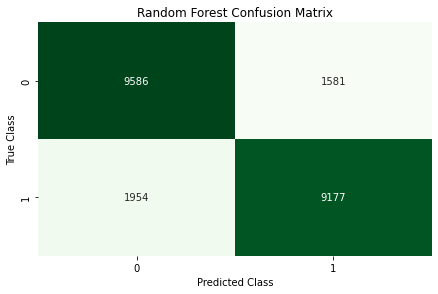

Classification Report:-
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     11167
           1       0.85      0.82      0.84     11131

    accuracy                           0.84     22298
   macro avg       0.84      0.84      0.84     22298
weighted avg       0.84      0.84      0.84     22298



In [61]:
#Random Forest Model
rfc = RandomForestClassifier(criterion = 'gini',n_estimators=200,max_depth=5,random_state=33, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)


#Score
#Score
rfc_accuracy = accuracy_score(y_test, rfc_y_pred)
print('Accuracy Score: ', rfc_accuracy*100)

#f1_score
rfc_f1_score = f1_score(y_test, rfc_y_pred)
print('f1 Score: ', rfc_f1_score*100)

#Confusion Matrix
rfc_cm = confusion_matrix(y_test, rfc_y_pred)
rfc_ConfusionMatrix = pd.DataFrame(rfc_cm, index=classes_names, columns=classes_names)

sns.heatmap(rfc_cm, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, rfc_y_pred))

### Ada Boost Classifier

Accuracy Score:  84.11068257242802
f1 Score:  83.79750308684318


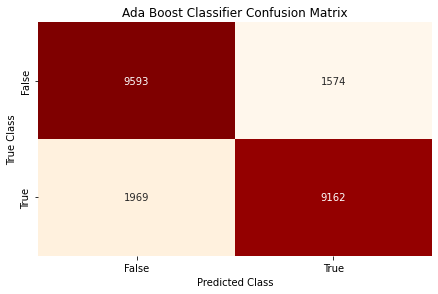

Classification Report:-
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     11167
           1       0.85      0.82      0.84     11131

    accuracy                           0.84     22298
   macro avg       0.84      0.84      0.84     22298
weighted avg       0.84      0.84      0.84     22298



In [62]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
adb_y_pred = adb.predict(X_test)

#Score
adb_accuracy = accuracy_score(y_test, adb_y_pred)
print('Accuracy Score: ', adb_accuracy*100)

#f1_score
adb_f1_score = f1_score(y_test, adb_y_pred)
print('f1 Score: ', adb_f1_score*100)

#Confusion Matrix
adb_cm = confusion_matrix(y_test, adb_y_pred)
adb_ConfusionMatrix = pd.DataFrame(adb_cm, index=classes_names, columns=classes_names)

sns.heatmap(adb_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Ada Boost Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, adb_y_pred))



### XG Boost Classifier

Accuracy Score:  86.43824558256345
f1 Score:  86.10549531336153


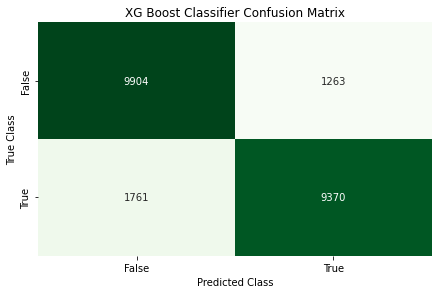

Classification Report:-
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     11167
           1       0.88      0.84      0.86     11131

    accuracy                           0.86     22298
   macro avg       0.87      0.86      0.86     22298
weighted avg       0.87      0.86      0.86     22298



In [63]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

#Score
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print('Accuracy Score: ', xgb_accuracy*100)

#f1_score
xgb_f1_score = f1_score(y_test, xgb_y_pred)
print('f1 Score: ', xgb_f1_score*100)

#Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_y_pred)

xgb_ConfusionMatrix = pd.DataFrame(xgb_cm, index=classes_names, columns=classes_names)

sns.heatmap(xgb_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("XG Boost Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, xgb_y_pred))



### Analysing different models

In [64]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Ada Boost Classifier','XG Boost Classifier'],
    'Accuracy Score': [lr_accuracy, dtree_accuracy, rfc_accuracy, adb_accuracy, xgb_accuracy],
    'f1 score': [lr_f1_score, dtree_f1_score, rfc_f1_score, adb_f1_score, xgb_f1_score] })

models.sort_values(['f1 score'], ascending=[False])

,Model,Accuracy Score,f1 score
4,XG Boost Classifier,0.864382,0.861055
2,Random Forest,0.841466,0.838503
3,Ada Boost Classifier,0.841107,0.837975
0,Logistic Regression,0.833124,0.821509
1,Decision Tree,0.813616,0.795573


Accuracy of XG Boost Classifier is better than other models **86.43%**. We are increase our model accuracy by applying hyperparameter tuning. 

### ROC curve

<Figure size 720x504 with 0 Axes>

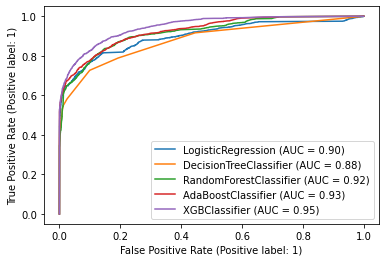

In [65]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(10,7))
fig = plot_roc_curve(lr, X_test, y_test)
fig = plot_roc_curve(dtree, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(rfc, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(adb, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(xgb, X_test, y_test, ax = fig.ax_)

plt.show()

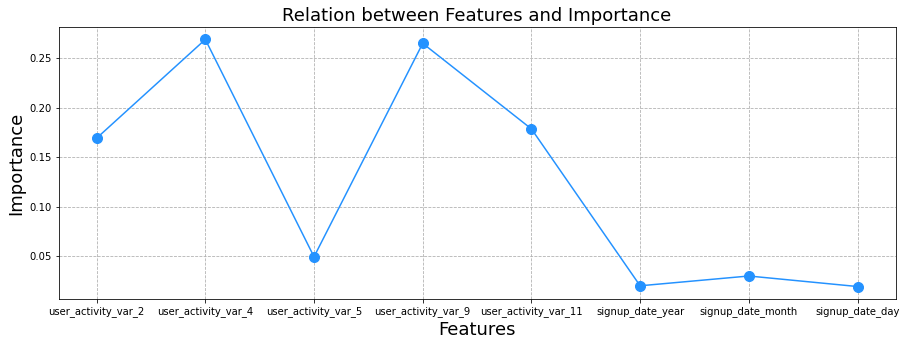

In [66]:
importance = xgb.feature_importances_

plt.figure(figsize=(15,5))
plt.ylabel('Importance', fontsize=18), plt.xlabel('Features', fontsize=18)
plt.title("Relation between Features and Importance", fontsize=18)
plt.plot(X.columns, importance, 'o-', color="#2492ff", markersize=10, label="Training score")
plt.grid(linestyle = '--', linewidth = 0.8)
plt.show()

### Hyper Parameter Tunning

For XGBoost Classifier we choosing the optimal paramerters for better efficiency.

In [68]:
from sklearn.model_selection import RandomizedSearchCV
#Choosing XGB Classifier
param = {'n_estimators' : [100, 200, 400, 500],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }
classifier = XGBClassifier()
GSCV = RandomizedSearchCV(classifier,param, cv=5)
GSCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'gamma': [2.0, 3.0, 4.0],
                                        'max_depth': [4, 6, 8],
                                        'n_estimators': [100, 200, 400, 500],
                                        'n_jobs': [-2, -1, 1]})

In [70]:
#Check best parameters
GSCV.best_params_

{'n_jobs': -2, 'n_estimators': 400, 'max_depth': 8, 'gamma': 3.0}

* best parameters:- {'n_jobs': -2, 'n_estimators': 400, 'max_depth': 8, 'gamma': 3.0}

In [71]:
# check best score
GSCV.best_score_

0.8957288013430318

Accuracy Score:  89.80626065117949
f1 Score:  89.67240674269617


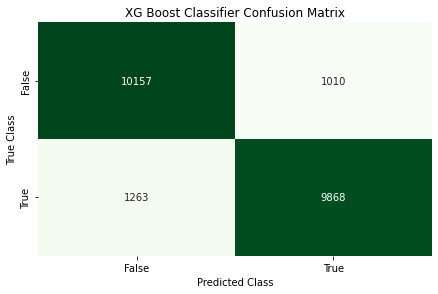

Classification Report:-
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     11167
           1       0.91      0.89      0.90     11131

    accuracy                           0.90     22298
   macro avg       0.90      0.90      0.90     22298
weighted avg       0.90      0.90      0.90     22298



In [72]:
# Final Model after Hyperparameter tunning

Final_Model = XGBClassifier(gamma=3.0, max_depth=8, n_estimators=400, n_jobs=-2)

classifier = Final_Model.fit(X_train, y_train)
fmod_pred = Final_Model.predict(X_test)

#Score
xgb_accuracy = accuracy_score(y_test, fmod_pred)
print('Accuracy Score: ', xgb_accuracy*100)

#f1_score
xgb_f1_score = f1_score(y_test, fmod_pred)
print('f1 Score: ', xgb_f1_score*100)

#Confusion Matrix
xgb_cm = confusion_matrix(y_test, fmod_pred)

xgb_ConfusionMatrix = pd.DataFrame(xgb_cm, index=classes_names, columns=classes_names)

sns.heatmap(xgb_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("XG Boost Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, fmod_pred))

Model **Accuracy Score** after hyper parameter tunning is **89.80%** & **f1 score** is **89.67%**

### Model Testing on Test dataset

In [73]:
test_df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaT,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [74]:
# check shape of test dataset
test_df.shape

(13184, 18)

In [75]:
# check basic information of dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    13184 non-null  int64         
 1   created_at            13184 non-null  datetime64[ns]
 2   campaign_var_1        13184 non-null  int64         
 3   campaign_var_2        13184 non-null  int64         
 4   products_purchased    5048 non-null   float64       
 5   signup_date           6535 non-null   datetime64[ns]
 6   user_activity_var_1   13184 non-null  int64         
 7   user_activity_var_2   13184 non-null  int64         
 8   user_activity_var_3   13184 non-null  int64         
 9   user_activity_var_4   13184 non-null  int64         
 10  user_activity_var_5   13184 non-null  int64         
 11  user_activity_var_6   13184 non-null  int64         
 12  user_activity_var_7   13184 non-null  int64         
 13  user_activity_va

In [76]:
# check statistical summary of test data
test_df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
count,13184.000000,13184.000000,13184.000000,5048.000000,13184.000000,13184.000000,13184.000000,13184.00000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000
mean,45753.500000,7.724439,7.943416,2.108954,0.386681,0.004248,0.103307,0.00713,0.153064,0.525485,0.304460,0.142673,0.008419,0.000228,0.253413,0.000228
std,3806.037309,3.599981,2.687832,0.783483,0.505653,0.065037,0.304371,0.08414,0.360695,0.565208,0.462989,0.349969,0.092200,0.015084,0.462698,0.015084
min,39162.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42457.750000,5.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45753.500000,8.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49049.250000,10.000000,10.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52345.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.00000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


In [77]:
# check is there any missing values present in test dataset
test_df.isnull().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [78]:
round(100*(test_df.isnull().sum()/len(train_df.index)), 2)

id                       0.00
created_at               0.00
campaign_var_1           0.00
campaign_var_2           0.00
products_purchased      20.78
signup_date             16.98
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_3      0.00
user_activity_var_4      0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
user_activity_var_11     0.00
user_activity_var_12     0.00
dtype: float64

 Here we can see some missing values present in `products_purchased` & `signup_date` columns.

* **Convert `signup_date`& `created_at` into year, month, day columns**

In [79]:
test_df['signup_date_year'] = test_df['signup_date'].dt.year
test_df['signup_date_month'] = test_df['signup_date'].dt.month
test_df['signup_date_day'] = test_df['signup_date'].dt.day
test_df.drop("signup_date", axis=1, inplace=True)
test_df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,signup_date_year,signup_date_month,signup_date_day
0,39162,2022-01-01,2,2,NaN,1,1,0,0,0,1,0,0,0,0,1,0,2021.0,8.0,17.0
1,39163,2022-01-01,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0,2020.0,5.0,21.0
2,39164,2022-01-01,8,7,NaN,0,0,0,0,1,1,0,0,0,0,0,0,NaN,NaN,NaN
3,39165,2022-01-01,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0,2020.0,6.0,22.0
4,39166,2022-01-01,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,2021.0,3.0,10.0


In [80]:
test_df['created_at_year'] = test_df['created_at'].dt.year
test_df['created_at_month'] = test_df['created_at'].dt.month
test_df['created_at_day'] = test_df['created_at'].dt.day
test_df.drop("created_at", axis=1, inplace=True)
test_df.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,signup_date_year,signup_date_month,signup_date_day,created_at_year,created_at_month,created_at_day
0,39162,2,2,NaN,1,1,0,0,0,1,...,0,0,1,0,2021.0,8.0,17.0,2022,1,1
1,39163,4,7,3.0,1,0,0,0,0,0,...,0,0,0,0,2020.0,5.0,21.0,2022,1,1
2,39164,8,7,NaN,0,0,0,0,1,1,...,0,0,0,0,NaN,NaN,NaN,2022,1,1
3,39165,9,8,2.0,0,0,0,0,1,1,...,0,0,2,0,2020.0,6.0,22.0,2022,1,1
4,39166,4,5,2.0,1,0,0,0,0,0,...,0,0,0,0,2021.0,3.0,10.0,2022,1,1


### Handling Missing Values

In [81]:
test_df.isnull().sum()

id                         0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
signup_date_year        6649
signup_date_month       6649
signup_date_day         6649
created_at_year            0
created_at_month           0
created_at_day             0
dtype: int64

In [82]:
test_df["products_purchased"]= test_df["products_purchased"].fillna(test_df["products_purchased"].mode()[0])
test_df["products_purchased"].value_counts()

2.0    10620
3.0     1260
1.0     1106
4.0      198
Name: products_purchased, dtype: int64

In [83]:
test_df["signup_date_year"].value_counts()

2021.0    2981
2020.0    1642
2022.0    1105
2019.0     597
2018.0     180
2017.0      25
2016.0       4
2015.0       1
Name: signup_date_year, dtype: int64

In [84]:
test_df["signup_date_year"]= test_df["signup_date_year"].fillna(test_df["signup_date_year"].mode()[0])

In [85]:
test_df["signup_date_day"].value_counts()

28.0    247
14.0    243
11.0    242
22.0    239
17.0    235
10.0    235
8.0     228
24.0    226
6.0     224
9.0     221
12.0    217
27.0    217
21.0    214
16.0    210
4.0     210
1.0     208
2.0     206
26.0    206
19.0    205
3.0     205
15.0    203
13.0    202
25.0    202
30.0    201
18.0    201
23.0    199
29.0    193
5.0     192
20.0    191
7.0     186
31.0    127
Name: signup_date_day, dtype: int64

In [86]:
test_df["signup_date_day"]= test_df["signup_date_day"].fillna(test_df["signup_date_day"].median())

In [87]:
test_df["signup_date_month"].value_counts()

3.0     828
1.0     661
12.0    635
2.0     629
11.0    575
10.0    555
8.0     503
9.0     502
7.0     469
6.0     402
5.0     397
4.0     379
Name: signup_date_month, dtype: int64

In [88]:
test_df["signup_date_month"]= test_df["signup_date_month"].fillna(test_df["signup_date_month"].mode()[0])

In [89]:
test_df.isnull().sum()

id                      0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
signup_date_year        0
signup_date_month       0
signup_date_day         0
created_at_year         0
created_at_month        0
created_at_day          0
dtype: int64

Successfully handling of missing values. No missig values present in dataset.

### Model Testing

In [90]:
test_df.columns

Index(['id', 'campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'signup_date_year', 'signup_date_month', 'signup_date_day',
       'created_at_year', 'created_at_month', 'created_at_day'],
      dtype='object')

In [91]:
col1=['user_activity_var_2','user_activity_var_4' ,'user_activity_var_5','user_activity_var_9', 'user_activity_var_11','signup_date_year','signup_date_month', 'signup_date_day' ]
test_df1 = test_df[col1]
test_df1.head()

,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_9,user_activity_var_11,signup_date_year,signup_date_month,signup_date_day
0,1,0,0,0,1,2021.0,8.0,17.0
1,0,0,0,0,0,2020.0,5.0,21.0
2,0,0,1,0,0,2021.0,3.0,16.0
3,0,0,1,0,2,2020.0,6.0,22.0
4,0,0,0,0,0,2021.0,3.0,10.0


In [92]:
#predicted buy for test data
test_df1['buy']=Final_Model.predict(test_df1)
test_df1.head()

,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_9,user_activity_var_11,signup_date_year,signup_date_month,signup_date_day,buy
0,1,0,0,0,1,2021.0,8.0,17.0,1
1,0,0,0,0,0,2020.0,5.0,21.0,0
2,0,0,1,0,0,2021.0,3.0,16.0,0
3,0,0,1,0,2,2020.0,6.0,22.0,1
4,0,0,0,0,0,2021.0,3.0,10.0,0


### Submission

In [93]:
sub = pd.DataFrame({'id':test_df['id'],'buy': test_df1['buy']})
sub.to_csv('submission.csv', index=False)
sub.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


# Model Created Successfully !